c) Write  a colab pytorch classes based - 3 layer deep neural network for non linear regression using pytorch builtin functionality of modules etc.,. backprop etc.,.

In [1]:
#importing libraries
import torch as T
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### **One Hot Encoding**

In [2]:
def one_hot_enc(y, num_labels=10):
    one_hot = T.zeros(num_labels, y.shape[0])

    for i, val in enumerate(y):
        one_hot[val,i] = 1.0

    return one_hot

### **Adding bias/weights**

In [3]:
def add_bias_unit(layer, orientation):
    if orientation == 'row':
        new_layer = T.ones((layer.shape[0]+1, layer.shape[1]))
        new_layer[1:, :] = layer
    elif orientation == 'col':
        new_layer = T.ones((layer.shape[0], layer.shape[1] + 1))
        new_layer[:, 1:] = layer

    return new_layer

In [4]:
def init_weights(n_input, n_hidden_1, n_hidden_2, n_output, batch_size):
    w1 = T.randn((n_hidden_1, n_input+1), dtype=T.float)
    w2 = T.randn((n_hidden_2, n_hidden_1+1), dtype=T.float)
    w3 = T.randn((n_output, n_hidden_2+1), dtype=T.float)

    return w1, w2, w3

### **Forward Propagation**

In [5]:
def compute_forward_pass(input, w1, w2, w3):
    a1 = T.reshape(input, shape=(input.shape[0], -1))
    a1 = add_bias_unit(a1, orientation='col')

    z2 = w1.matmul(T.transpose(a1, 0, 1))
    a2 = T.sigmoid(z2)
    a2 = add_bias_unit(a2, orientation='row')

    z3 = w2.matmul(a2)
    a3 = T.sigmoid(z3)
    a3 = add_bias_unit(a3, orientation='row')

    z4 = w3.matmul(a3)
    a4 = T.sigmoid(z4)

    return a1, z2, a2, z3, a3, z4, a4

### **Prediction**

In [6]:
def predict(a4):
    prediction = T.argmax(a4, dim=0)

    return prediction

### **Loss Computation**

In [7]:
def compute_loss(prediction, label):
    term_1 = -1*label * T.log(prediction)
    term_2 = (1-label)*(T.log(1-prediction))

    loss = T.sum(term_1 - term_2)
    return loss

### **Backward Propagation**

In [8]:
def compute_backward_pass(weights, outputs, label):
    w1, w2, w3 = weights
    a1, z2, a2, z3, a3, z4, a4 = outputs

    delta_4 = a4 - label
    delta_3 = T.transpose(w3[:,1:], 0,1).matmul(delta_4)*\
             T.sigmoid(z3)*(1-T.sigmoid(z3))
    delta_2 = w2[:,1:].matmul(delta_3)*T.sigmoid(z2)*(1-T.sigmoid(z2))

    grad_w1 = delta_2.matmul(a1)
    grad_w2 = delta_3.matmul(T.transpose(a2,0,1))
    grad_w3 = delta_4.matmul(T.transpose(a3,0,1))

    return grad_w1, grad_w2, grad_w3

### **Getting data**

In [9]:
def get_data(train_batch_size, test_batch_size=10):
    mnist_train_data = MNIST('mnist',
                             train=True, download=True, transform=ToTensor())
    train_data_loader = T.utils.data.DataLoader(mnist_train_data,
                                                batch_size=train_batch_size,
                                                shuffle=True,
                                                num_workers=8)
    mnist_test_data = MNIST('mnist',
                            train=False, download=True, transform=ToTensor())
    test_data_loader = T.utils.data.DataLoader(mnist_test_data,
                                                batch_size=test_batch_size,
                                                shuffle=True,
                                                num_workers=8)
    return train_data_loader, test_data_loader


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch  0 training accuracy 0.45
epoch  1 training accuracy 0.56
epoch  2 training accuracy 0.62
epoch  3 training accuracy 0.66
epoch  4 training accuracy 0.69
epoch  5 training accuracy 0.71
epoch  6 training accuracy 0.73
epoch  7 training accuracy 0.75
epoch  8 training accuracy 0.76
epoch  9 training accuracy 0.77
epoch  10 training accuracy 0.78
epoch  11 training accuracy 0.79
epoch  12 training accuracy 0.79
epoch  13 training accuracy 0.80
epoch  14 training accuracy 0.81
epoch  15 training accuracy 0.81
epoch  16 training accuracy 0.82
epoch  17 training accuracy 0.82
epoch  18 training accuracy 0.82
epoch  19 training accuracy 0.83
epoch  20 training accuracy 0.83
epoch  21 training accuracy 0.84
epoch  22 training accuracy 0.84
epoch  23 training accuracy 0.84
epoch  24 training accuracy 0.84
epoch  25 training accuracy 0.85
epoch  26 training accuracy 0.85
epoch  27 training accuracy 0.85
epoch  28 training accuracy 0.85
epoch  29 training accuracy 0.86
epoch  30 training a

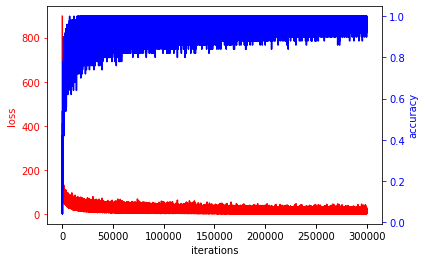


-------------

EVALUATE TEST DATA

Testing Accuracy 0.99


In [10]:
batch_size = 50
n_input = 28*28

n_hidden_1, n_hidden_2, n_output = 100, 100, 10
w1, w2, w3 = init_weights(n_input, n_hidden_1, n_hidden_2,
                            n_output, batch_size)

eta = 0.001 # learning rate
alpha = 0.001 # momentum factor
num_epochs = 250

delta_w1_prev = T.zeros(w1.shape)
delta_w2_prev = T.zeros(w2.shape)
delta_w3_prev = T.zeros(w3.shape)

train_losses = []
train_acc = []

train_data, test_data = get_data(batch_size)

for i in range(num_epochs):
    for j, (input, label) in enumerate(train_data):
        one_hot_label = one_hot_enc(label, num_labels=10)
        a1, z2, a2, z3, a3, z4, a4 = compute_forward_pass(input, w1,w2,w3)
        loss = compute_loss(a4, one_hot_label.float())
        grad1, grad2, grad3 = compute_backward_pass([w1, w2, w3],
                                        [a1, z2, a2, z3, a3, z4, a4],
                                        one_hot_label.float())

        delta_w1, delta_w2, delta_w3 = eta*grad1, eta*grad2, eta*grad3

        w1 -= delta_w1 + delta_w1_prev*alpha
        w2 -= delta_w2 + delta_w2_prev*alpha
        w3 -= delta_w3 + delta_w3_prev*alpha

        delta_w1_prev, delta_w2_prev, delta_w3_prev = \
                                                delta_w1, delta_w2, delta_w3

        train_losses.append(loss)
        predictions = predict(a4)

        wrong = T.where(predictions != label,
                        T.tensor([1.]), T.tensor([0.]))
        accuracy = 1 - T.sum(wrong)/batch_size
        train_acc.append(accuracy.float())

    print('epoch ', i, 'training accuracy %.2f' %
            T.mean(T.tensor(train_acc)).item())

fig = plt.figure()
ax = fig.add_subplot(111, label='1')
ax2 = fig.add_subplot(111, label='2', frame_on=False)
ax.plot(train_losses, color='red')
ax.set_xlabel('iterations')
ax.set_ylabel('loss', color='red')
ax.tick_params(axis='y', colors="red")
ax2.plot(train_acc, color='blue')
ax2.yaxis.tick_right()
ax2.set_ylabel('accuracy', color='blue')
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='y', colors="blue")
ax2.set_xticklabels([])
plt.show()

print('\n-------------\n')
print('EVALUATE TEST DATA\n')

test_acc = []
for j, (input, label) in enumerate(test_data):
    one_hot_label = one_hot_enc(label, num_labels=10)
    a1, z2, a2, z3, a3, z4, a4 = compute_forward_pass(input,w1,w2,w3)
    loss = compute_loss(a4, one_hot_label.float())

    predictions = predict(a4)
    wrong = T.where(predictions != label, T.tensor([1.]), T.tensor([0.]))
    accuracy = 1 - T.sum(wrong)/batch_size

    test_acc.append(accuracy)

print('Testing Accuracy %.2f' % T.mean(T.tensor(test_acc)).item())

In [ ]:
#reference: https://www.youtube.com/watch?v=47UH4JijIk4